# Volume 4: Optimal Control as Boundary Value Problems
    Benj McMullin
    3/28/2024
    Math 439

In [37]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

## Problem 1
Given the following cost functional and boundary conditions, solve for and plot the optimal path and acceleration.
\begin{align*}
    J(u) &= \int_0^{30} x^2 + \frac{2\pi}{5}u^2dt \\
    s(t) &= \begin{bmatrix}x(t)\\x'(t) \end{bmatrix}, s(0) = \begin{bmatrix}0\\1 \end{bmatrix}, \quad s(30) = \begin{bmatrix}16\\10 \end{bmatrix}
\end{align*}
Plot your solutions for the optimal $x(t)$ and $u(t)$.

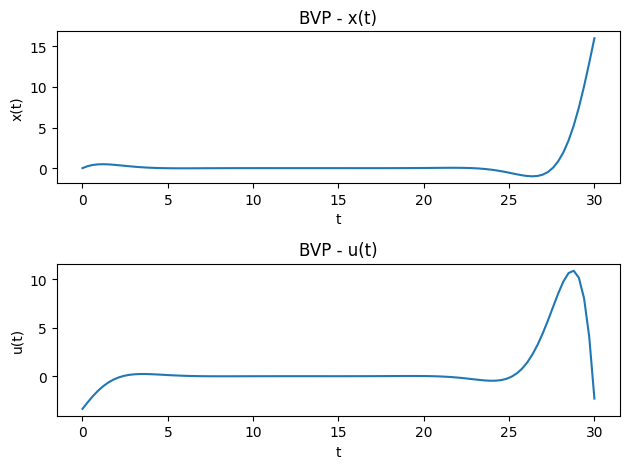

In [38]:
def prob1():
    '''
    Solve the boundary value problem (BVP) to find the optimal path for the fixed time horizon problem.

    This function defines the boundary conditions and the ordinary differential equation (ODE) system,
    sets up the elements for the numerical solver, and plots the solution.

    Parameters:
        None

    Returns:
        None
    '''

    def bc(ya, yb):
        """Define the boundary conditions for the BVP."""
        return np.array([ya[0], ya[1] - 1, yb[0] - 16, yb[1] - 10])
    
    def ode(t, y):
        """
        Define the ordinary differential equation (ODE) system.

        This function represents the dynamics of the system.

        Parameters:
            t (float): Time variable
            y (array): State vector

        Returns:
            array: Array containing the derivatives of the state variables
        """
        # Define the ODE system
        return np.array([y[1], 5 / (4 * np.pi) * y[3], -2 * y[0], y[2]])
    
    # Set up time steps
    t_steps = 100
    t = np.linspace(0, 30, t_steps)
    
    # Initial guess for the solution
    y0 = np.ones((4, t_steps))
    
    # Solve the boundary value problem
    sol = solve_bvp(ode, bc, t, y0)
    
    # Plot the solution
    plt.subplot(211)
    plt.plot(sol.x, sol.y[0])
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.title("BVP - x(t)")

    plt.subplot(212)
    plt.plot(sol.x, sol.y[3])
    plt.xlabel('t')
    plt.ylabel('u(t)')
    plt.title("BVP - u(t)")
    plt.tight_layout()
    plt.show()

prob1()

## Problem 2 
Using the ODEs found in 14.7 and 14.11, the obstacle function 14.8, and the following boundary conditions and parameters solve for and plot the optimal path.
\begin{align*}
    t_0 = 0 &, \quad t_f = 20\\
    (c_x,c_y) &= (4,1)\\
    (r_x,r_y) &= (5,.5)\\
    \lambda &= 20\\
    s_0 = \begin{bmatrix}6\\1.5\\0\\0 \end{bmatrix}&, \quad s_f = \begin{bmatrix}0\\0\\0\\0 \end{bmatrix}
\end{align*}
You will need to choose a $W_1$ and $W_2$ which allow the solver to find a valid path.
If these parameters are not chosen correctly, the solver may find a path which goes through the obstacle, not around it.
Plot the obstacle using plt.contour() to be certain path doesn't pass through the obstacle.

In [39]:
def obstacle(x,y,W1=1,r=(1,1),c=(0,0)):
    '''
    Define an area that will represent an obstacle
    
    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    ellipse = ((x - c[0])**2/r[0] + (y - c[1])**2/r[1])**20 + 1

    return W1 / ellipse

def obstacle_dx(x,y,W1=1,r=(1,1,),c=(0,0)):
    '''
    x derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40* W1 * (x-c[0])*(circle)**19
    denom = r[0]*((circle)**20 + 1)**2

    return numer / denom

def obstacle_dy(x,y,W1=1,r=(1,1,),c=(0,0)):
    '''
    y derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40 * W1 * (y-c[1])*(circle)**19
    denom = r[1]*((circle)**20 + 1)**2

    return numer / denom

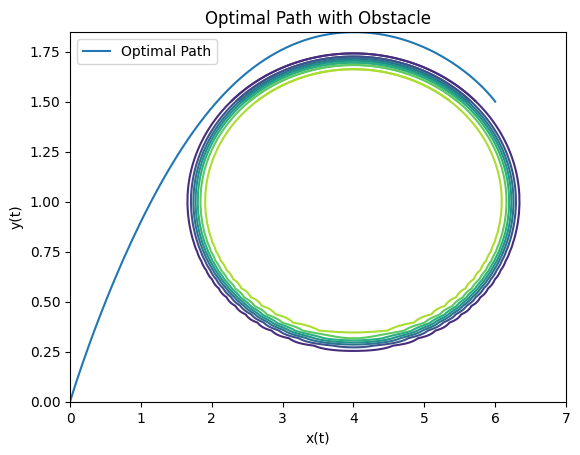

In [40]:
def prob2():
    '''
    Find the optimal path for the fixed time horizon problem.

    This function defines and solves an optimal control problem using the boundary value problem (BVP) solver.
    It aims to find the optimal path for a given fixed time horizon by minimizing a cost function.

    Parameters:
        None

    Returns:
        None
    '''

    # Initialize parameters
    W1, W2 = 3, 70  # Weight parameters
    c = (4, 1)      # Center of the obstacle
    r = (5, 0.5)    # Radii of the obstacle
    lam = 20        # Regularization parameter
    
    def bc(ya, yb):
        """Define boundary conditions for the BVP."""
        return np.array([ya[0] - 6, ya[1] - 1.5, ya[2], ya[3],
                         yb[0], yb[1], yb[2], yb[3]])
    
    def ode(t, y):
        """
        Define the ordinary differential equation (ODE) system.

        This function represents the dynamics of the system.

        Parameters:
            t (float): Time variable
            y (array): State vector

        Returns:
            array: Array containing the derivatives of the state variables
        """
        # Define the ODE system
        return np.array([y[2], y[3], y[6] / (2 * W2), y[7] / (2 * W2), 
                         obstacle_dx(y[0], y[1], W1, r, c), 
                         obstacle_dy(y[0], y[1], W1, r, c), 
                         -y[4], -y[5]])
    
    # Set up time steps
    t_steps = 100
    t = np.linspace(0, 20, t_steps)
    
    # Initial guess for the solution
    y0 = np.ones((8, t_steps))
    
    # Solve the boundary value problem
    sol = solve_bvp(ode, bc, t, y0, max_nodes=30000)
    
    # Plot the optimal path and the obstacle
    plt.plot(sol.y[0], sol.y[1], label="Optimal Path")

    X, Y = np.meshgrid(np.linspace(0, 7, len(sol.y[1])), sol.y[1])
    obstacle_ = obstacle(X, Y, W1, r, c)
    
    plt.contour(X, Y, obstacle_)
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    plt.xlim(0, 7)
    plt.title("Optimal Path with Obstacle")
    plt.legend()
    plt.show()

prob2()

## Problem 3
Solve the following boundary value problem:
\begin{align*}
    y'' + 3y &= \sin(t)\\
    y(0) = 0,\quad y(t_f) = &\frac{\pi}{2}, \quad y'(t_f) = \frac{1}{2}\left(\sqrt{3}\pi \cot(\pi\sqrt{75}) - 1 \right).
\end{align*}
Plot your solution. What $t_f$ did the solver find?

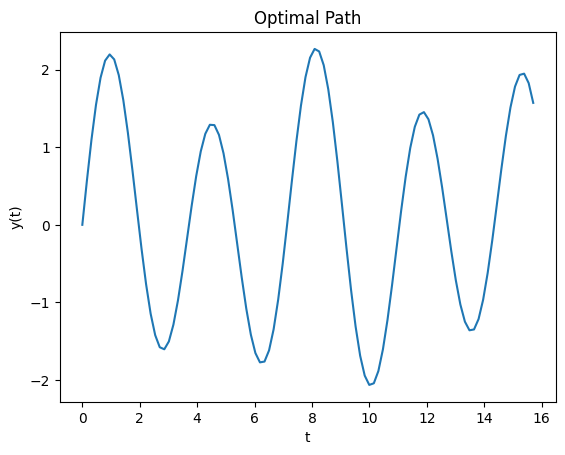

tf = 15.70805303607482


In [41]:
def prob3():
    '''
    Solve the free time horizon boundary value problem (BVP).

    This function defines the boundary conditions and the ordinary differential equation (ODE) system,
    sets up the elements for the numerical solver, solves the BVP, plots the solution, and returns the correct end time.

    Parameters:
        None

    Returns:
        float: Correct end time
    '''

    def bc(ya, yb, p):
        """Define the boundary conditions for the BVP."""
        return np.array([ya[0], yb[0] - np.pi / 2, yb[1] - 0.5 * (np.sqrt(3) * np.pi / np.tan(np.pi * np.sqrt(75)) - 1)])
    
    def ode(t, y, p):
        """
        Define the ordinary differential equation (ODE) system.

        This function represents the dynamics of the system.

        Parameters:
            t (float): Time variable
            y (array): State vector
            p (array): Parameter vector

        Returns:
            array: Array containing the derivatives of the state variables
        """
        return p[0] * np.array([y[1], np.sin(p[0] * t) - 3 * y[0]])
    
    # Set up time steps
    t_steps = 100
    t = np.linspace(0, 1, t_steps)
    
    # Initial guess for the solution and parameter
    y0 = np.ones((2, t_steps))
    p0 = np.array([5 * np.pi])
    
    # Solve the boundary value problem
    sol = solve_bvp(ode, bc, t, y0, p0)
    
    # Plot the solution
    plt.plot(sol.p[0] * t, sol.sol(t)[0])
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.title("Optimal Path")
    plt.show()
    
    # Return the correct end time
    return sol.p[0]

correct_end_time = prob3()
print(f"tf =", correct_end_time)
   

## Problem 4
Refactor your code from Problem 2 to create a free end time BVP and use a new boundary value derived from 

$H(t_f,p(t_f),s(t_f),u(t_f)) = 0.$

Let $W_1 = 4$ and $W_2 = 0.1$, and use $6$ as the initial guess for p(0).
Plot the solution you found.
What is the optimal time?

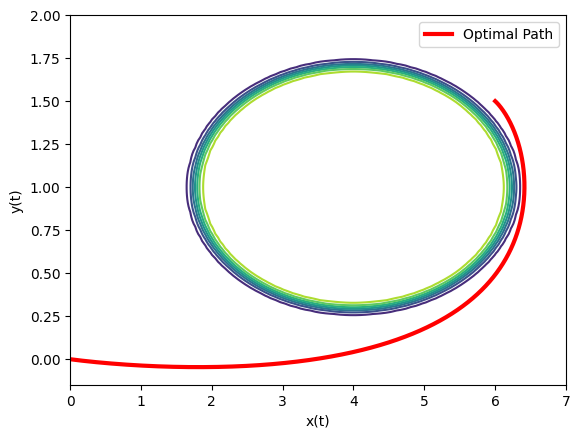

In [46]:
def prob4():
    """
    Find the optimal path and time for the free time horizon problem.
    Plot the solution and return the optimal time.
    """
    # Define problem parameters
    t0, tf = 0, 20
    cx, cy = 4, 1
    rx, ry = 5, 0.5
    lmbda = 20
    W1, W2 = 4, 0.1
    s0 = np.array([6, 1.5, 0, 0])
    sf = np.array([0, 0, 0, 0])
    p0 = np.array([6])
    
    def ode(t, y, p):
        """ Set up the ODE for the problem. """
        x, y_, xp, yp, p1, p2, p3, p4 = y
        tf = p[0]
        return tf * np.array([
            xp,
            yp,
            p3 / (2 * W2),  # x'' = u1 = 1 / (2 * W2) * p3
            p4 / (2 * W2),  # y'' = u2 = 1 / (2 * W2) * p4
            obstacle_dx(x, y_, W1=W1, r=(rx, ry), c=(cx, cy)),
            obstacle_dy(x, y_, W1=W1, r=(rx, ry), c=(cx, cy)),
            -p1,
            -p2
        ])
        
    def bc(ya, yb, p):
        """ Specify the boundary conditions for the problem. """
        s1, s2, s3, s4, p1, p2, p3, p4 = yb
        u1 = p3 / (2 * W2)
        u2 = p4 / (2 * W2)
        x, y = s1, s2
        C_x_y = obstacle(x, y, W1, (rx, ry), (cx, cy))
        return np.array([
            ya[0] - s0[0],
            ya[1] - s0[1],
            ya[2] - s0[2],
            ya[3] - s0[3],
            yb[0] - sf[0],
            yb[1] - sf[1],
            yb[2] - sf[2],
            yb[3] - sf[3],
            p1 * s3 + p2 * s4 + p3 * u1 + p4 * u2 - (1 + C_x_y + W2 * (u1**2 + u2**2))
        ])
    
    # Determine how long to run the BVP solver
    t_span = (t0, tf)
    t_steps = 200
    t = np.linspace(t_span[0], t_span[1], t_steps)
    
    # Solve the BVP with the initial guess y0
    y0 = 3 * np.ones((8, t_steps))
    sol = solve_bvp(ode, bc, t, y0, p0, max_nodes=60_000)
    
    # Extract values from the solution
    t, res = sol.x, sol.y
    x, y, xp, yp, p1, p2, p3, p4 = sol.y
    
    # Compute the optimal control
    u1 = p3 / (2 * W2)
    u2 = p4 / (2 * W2)
    
    # Plot the trajectory
    plt.plot(x, y, linewidth=3, color="red", label="Optimal Path")
    
    # Plot the obstacle
    x_domain = np.linspace(0, 7, 100)
    y_domain = np.linspace(0, 2, 100)
    X, Y = np.meshgrid(x_domain, y_domain)
    Z = obstacle(X, Y, W1=W1, r=(rx, ry), c=(cx, cy))
    plt.contour(X, Y, Z, cmap='viridis')
    plt.xlabel("x(t)")
    plt.ylabel("y(t)")
    plt.legend()
    plt.show()

prob4()